[View in Colaboratory](https://colab.research.google.com/github/DillipKS/ZS_2018_challenge/blob/master/ZS_challenge_code.ipynb)

#ZS 2018 challenge conducted by Hackerrank. 

Link: https://www.hackerearth.com/challenge/competitive/zs-data-science-challenge-2018/

Author: DILLIP KUMAR SAHOO

This python notebook will introduce you to data visualisation and data manipulation. You will train a Linear Regressor with Adagrad optimizer and L2 regularization.

**Happy coding!**

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [2]:
!pip install -U -q PyDrive
!pip install -U -q xlrd
!pip install --upgrade pip
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.0)


Import the datasets in your Google Drive from Github and make all of them shareable. In the shared link for each file, there will be a unique ID which you need to copy and paste here as value to the 'id' key.

In [0]:
# Code to read csv file from Google Drive into colaboratory:

#1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1HkQQm9ys0UiNRG1X2J66HZGcFFi75tna'})   # replace the id with id of file you want to access
downloaded.GetContentFile('promotional_expenses.csv')  

#3. Read file as panda dataframe
expenses_df = pd.read_csv('promotional_expenses.csv') 


downloaded = drive.CreateFile({'id':'1Z_XB6-ruOICXEYs_1aEWY9h2WZNVT_JW'})
downloaded.GetContentFile('yds_train2018.csv')  
yds_train_df = pd.read_csv('yds_train2018.csv') 

downloaded = drive.CreateFile({'id':'17GNCPd-9TEruKVNUQTOkKraMOZRy3KgN'})
downloaded.GetContentFile('yds_test2018.csv')  
yds_test_df = pd.read_csv('yds_test2018.csv') 

downloaded = drive.CreateFile({'id':'1JMfYCyWxZVm71U5amCrOmL0HxC-BlV4w'})
downloaded.GetContentFile('holidays.xlsx')  
holidays_df = pd.read_excel('holidays.xlsx') 

** Data visualisation**


Visualise the data as tables and histograms to understand the problem and data further.


        Year  Month  Product_ID  Expense_Price
count  435.0  435.0       435.0          435.0
mean  2014.6    6.2         2.5         9235.7
std      1.2    3.5         1.3        18254.7
min   2013.0    1.0         1.0          153.2
25%   2014.0    3.0         2.0          518.1
50%   2015.0    6.0         2.0         1732.6
75%   2016.0    9.0         4.0         3603.5
max   2017.0   12.0         5.0        84161.8
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9e11b9978>
   Year  Month    Country  Product_ID  Expense_Price
0  2013      1  Argentina           1        14749.3
1  2013      1  Argentina           2         1329.4
2  2013      1    Belgium           2          249.6
3  2013      1   Columbia           1         1893.1
4  2013      1   Columbia           2         1436.7


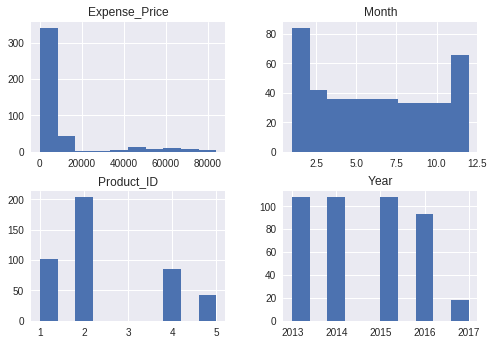

In [4]:
#1. Expenses data
print(expenses_df.describe())
print(expenses_df.hist())
print(expenses_df.head())

In [5]:
#2. Holidays date data
print(holidays_df.head())

          Date  Country          Holiday
0   2014, 1, 1  Denmark        Nytårsdag
1  2014, 4, 17  Denmark      Skærtorsdag
2  2014, 4, 18  Denmark       Langfredag
3  2014, 4, 20  Denmark         Påskedag
4  2014, 4, 21  Denmark   Anden påskedag


         S_No    Year   Month    Week  Product_ID      Sales
count 79072.0 79072.0 79072.0 79072.0     79072.0    79072.0
mean  39536.5  2014.2     6.3    25.6         2.2   104967.8
std   22826.3     1.0     3.5    15.2         1.1   764231.0
min       1.0  2013.0     1.0     1.0         1.0 -2406068.7
25%   19768.8  2013.0     3.0    12.0         1.0      952.5
50%   39536.5  2014.0     6.0    25.0         2.0     6400.0
75%   59304.2  2015.0     9.0    39.0         2.0    24185.2
max   79072.0  2016.0    12.0    53.0         5.0 34874313.0
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9de913588>
   S_No  Year  Month  Week Merchant_ID  Product_ID    Country    Sales
0     1  2013      1     1     ar00001           1  Argentina 157500.0
1     2  2013      1     1     ar00003           1  Argentina  39375.0
2     3  2013      1     1     ar00004           1  Argentina  15750.0
3     4  2013      1     1     ar00007           1  Argentina  47250.0
4     5  2013      1     1   

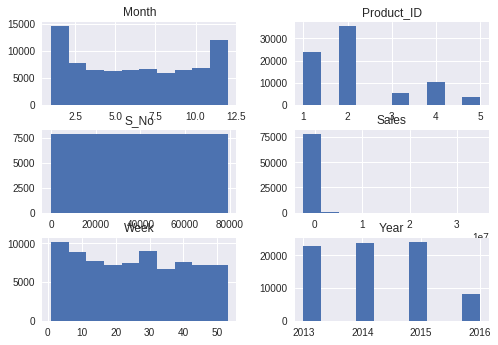

In [6]:
#3. Training data

print(yds_train_df.describe())
print(yds_train_df.hist())
print(yds_train_df.head())

Notice Sales value can be Negative.

In [7]:
yds_train_df.loc[(yds_train_df['Sales'] < 0)]

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
2992,2993,2014,9,38,ar000012,1,Argentina,-40950.0
3994,3995,2015,4,18,ar000048,1,Argentina,-36225.0
4672,4673,2015,10,43,ar0000112,1,Argentina,-157500.0
4796,4797,2015,11,49,ar000070,1,Argentina,-14175.0
4820,4821,2015,12,49,ar000070,1,Argentina,-4725.0
...,...,...,...,...,...,...,...,...
77284,77285,2015,3,12,f000022,4,Finland,-907.0
77286,77287,2015,3,12,f000025,4,Finland,-226.7
77288,77289,2015,3,12,f000053,4,Finland,-2267.4
77291,77292,2015,3,13,f00002,4,Finland,-4534.8


         S_No   Year  Month  Product_ID  Sales
count   105.0  105.0  105.0       105.0    0.0
mean  79125.0 2016.2    6.0         2.4    nan
std      30.5    0.5    3.6         1.3    nan
min   79073.0 2015.0    1.0         1.0    nan
25%   79099.0 2016.0    3.0         2.0    nan
50%   79125.0 2016.0    6.0         2.0    nan
75%   79151.0 2016.0    9.0         4.0    nan
max   79177.0 2017.0   12.0         5.0    nan
      S_No  Year  Month  Product_ID    Country  Sales
0    79073  2016      4           1  Argentina    nan
1    79074  2016      5           1  Argentina    nan
2    79075  2016      6           1  Argentina    nan
3    79076  2016      7           1  Argentina    nan
4    79077  2016      8           1  Argentina    nan
..     ...   ...    ...         ...        ...    ...
100  79173  2016      3           4    Finland    nan
101  79174  2016      4           4    Finland    nan
102  79175  2016      5           4    Finland    nan
103  79176  2016      6           4  

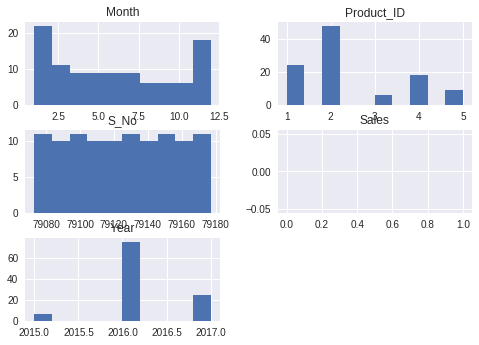

In [149]:
#4. Test data
# Value in Sales column needs to be predicted

print(yds_test_df.describe())
print(yds_test_df)
print(yds_test_df.hist())

Merchant_ID and Week columns are not present in Test data. At first glance, they seem irrelevant for Model training. Hence, group Training data rows summing the Sales value for common Merchant_ID and Week values.

   Year  Month    Country  Product_ID      Sales
0  2013      1  Argentina           1 34346025.0
1  2013      1  Argentina           2  2751851.5
2  2013      1    Belgium           2   314850.1
3  2013      1   Columbia           1  3947356.3
4  2013      1   Columbia           2  2885137.1
        Year  Month  Product_ID       Sales
count  388.0  388.0       388.0       388.0
mean  2014.3    6.3         2.5  21391784.2
std      1.0    3.5         1.2  39046567.5
min   2013.0    1.0         1.0     22459.6
25%   2013.0    3.0         2.0    660477.9
50%   2014.0    6.0         2.0   4482666.0
75%   2015.0    9.0         4.0  24031179.4
max   2016.0   12.0         5.0 199093884.0
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9de647ac8>


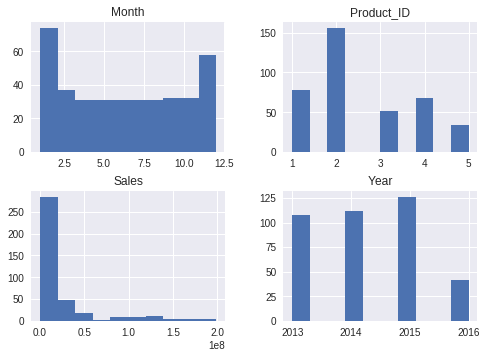

In [9]:
grouped_df = yds_train_df[["Year","Month","Product_ID","Country","Sales"]]
grouped_df = grouped_df.groupby(["Year","Month","Country","Product_ID"]).sum().apply(list)
grouped_df = grouped_df.reset_index()    # flattening the grouped dataframe

print(grouped_df.head())
print(grouped_df.describe())
print(grouped_df.hist())

Notice that Sales value in the grouped Training data is always positive for all rows. Also, the total number of rows now are 388, earlier there were 79072 rows.

Expenses data is given against 4 features, namely, Year, Month, Country and Product_ID, which are also the ones in grouped Training and Test data. Hence, merge Expenses data with grouped Training and Test data.

        Year  Month  Product_ID  Expense_Price       Sales
count  388.0  388.0       388.0          336.0       388.0
mean  2014.3    6.3         2.5         8744.2  21391784.2
std      1.0    3.5         1.2        16803.4  39046567.5
min   2013.0    1.0         1.0          153.2     22459.6
25%   2013.0    3.0         2.0          436.4    660477.9
50%   2014.0    6.0         2.0         1732.2   4482666.0
75%   2015.0    9.0         4.0         3397.4  24031179.4
max   2016.0   12.0         5.0        80201.5 199093884.0
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9de4e1cf8>
     Year  Month    Country  Product_ID  Expense_Price      Sales
0    2013      1  Argentina           1        14749.3 34346025.0
1    2013      1  Argentina           2         1329.4  2751851.5
2    2013      1    Belgium           2          249.6   314850.1
3    2013      1   Columbia           1         1893.1  3947356.3
4    2013      1   Columbia           2         1436.7  2885137.1
..    

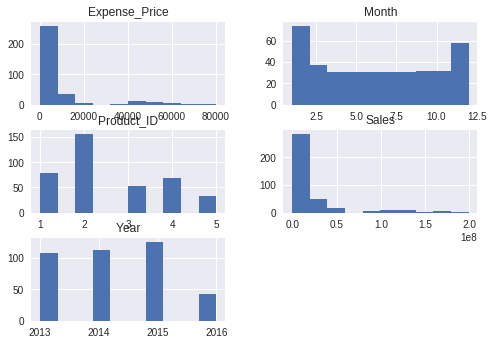

In [10]:
merge_train_df = pd.merge(expenses_df, grouped_df, on = ['Year','Month','Product_ID','Country'], how='right')

print(merge_train_df.describe())
print(merge_train_df.hist())
print(merge_train_df)

Notice that there are some rows with Nan value against Expense_Price column. It means expenses data is unavailable for those rows in the grouped Training data.

Values in Expense_Price and Sales column are given in local currency of that particular country. We need to convert them to a common currency (like USD) and scale those values accordingly.

Conversion rate for different currencies to USD as on 23rd July '18 are used as below:


*   arg_usd = 0.036 (Argentina)
*   bel_usd = 1.17 (Belgium)
*   col_usd = 0.00035 (Columbia)
*   den_usd = 0.16 (Denmark)
*   eng_usd = 1.31 (England)
*   fin_usd = 1.17 (Finland)  

In [0]:
def scaling_usd(merge_train_df):
  # Scaling local currency to USD
  
  merge_train_df["Scaled_Expense_Price"] = pd.Series()
  merge_train_df["Scaled_Sales"] = pd.Series()

  # Local currency to USD conversion rate
  arg_usd = 0.036
  bel_usd = 1.17
  col_usd = 0.00035
  den_usd = 0.16
  eng_usd = 1.31
  fin_usd = 1.17

  for i, row in merge_train_df.iterrows():
    if row["Country"] == 'Argentina':
      merge_train_df.at[i, "Scaled_Expense_Price"] = arg_usd * row["Expense_Price"]
      merge_train_df.at[i, "Scaled_Sales"] = arg_usd * row["Sales"]
    elif row["Country"] == 'Belgium':
      merge_train_df.at[i, "Scaled_Expense_Price"] = bel_usd * row["Expense_Price"]
      merge_train_df.at[i, "Scaled_Sales"] = bel_usd * row["Sales"]
    elif row["Country"] == 'Columbia':
      merge_train_df.at[i, "Scaled_Expense_Price"] = col_usd * row["Expense_Price"]
      merge_train_df.at[i, "Scaled_Sales"] = col_usd * row["Sales"]
    elif row["Country"] == 'Denmark':
      merge_train_df.at[i, "Scaled_Expense_Price"] = den_usd * row["Expense_Price"]
      merge_train_df.at[i, "Scaled_Sales"] = den_usd * row["Sales"]
    elif row["Country"] == 'England':
      merge_train_df.at[i, "Scaled_Expense_Price"] = eng_usd * row["Expense_Price"]
      merge_train_df.at[i, "Scaled_Sales"] = eng_usd * row["Sales"]
    elif row["Country"] == 'Finland':
      merge_train_df.at[i, "Scaled_Expense_Price"] = fin_usd * row["Expense_Price"]
      merge_train_df.at[i, "Scaled_Sales"] = fin_usd * row["Sales"]
  
  return merge_train_df

   Year  Month    Country  Product_ID  Expense_Price      Sales  \
0  2013      1  Argentina           1        14749.3 34346025.0   
1  2013      1  Argentina           2         1329.4  2751851.5   
2  2013      1    Belgium           2          249.6   314850.1   
3  2013      1   Columbia           1         1893.1  3947356.3   
4  2013      1   Columbia           2         1436.7  2885137.1   

   Scaled_Expense_Price  Scaled_Sales  
0                 531.0     1236456.9  
1                  47.9       99066.7  
2                 292.0      368374.7  
3                   0.7        1381.6  
4                   0.5        1009.8  
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa0f804400>
        Year  Month  Product_ID  Expense_Price       Sales  \
count  388.0  388.0       388.0          336.0       388.0   
mean  2014.3    6.3         2.5         8744.2  21391784.2   
std      1.0    3.5         1.2        16803.4  39046567.5   
min   2013.0    1.0         1.0          1

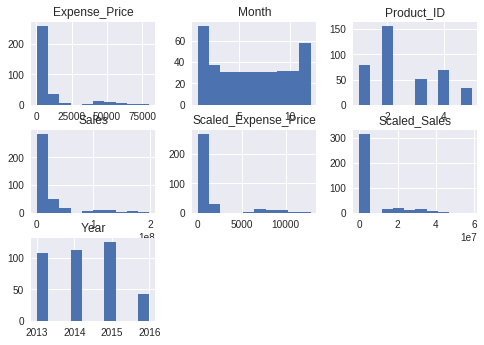

In [12]:
merge_train_df = scaling_usd(merge_train_df)
print(merge_train_df.head())
print(merge_train_df.hist())
print(merge_train_df.describe())

After grouping and standardizing the training data, let's visualize the data now between each feature and target value (Scaled_Sales).

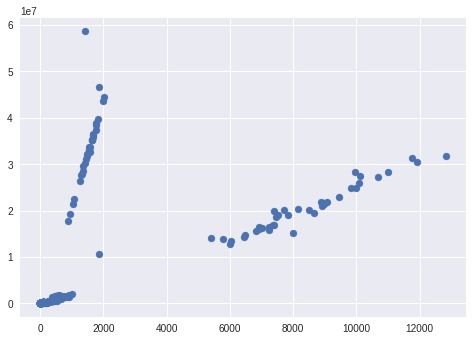

In [13]:
plt.scatter(merge_train_df["Scaled_Expense_Price"], merge_train_df["Scaled_Sales"])

Notice how all the data points are grouped in 3 different bins, first in which points are close to 0, second in which expense price < 2200 and points are aligned in a line having high slope, 3rd in which expense price > 5000 and points align in a line having moderate slope in above graph Scaled_Expense_Price v/s Scaled_Sales. Capture the data points placed in these 3 bins and plot them separately.



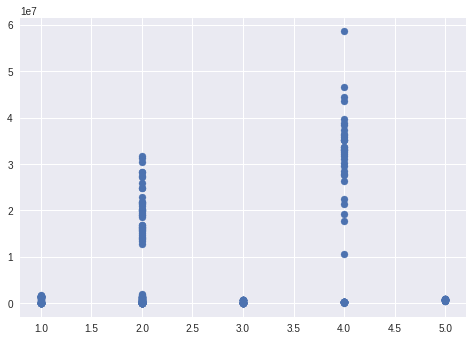

In [14]:
plt.scatter(merge_train_df["Product_ID"], merge_train_df["Scaled_Sales"])

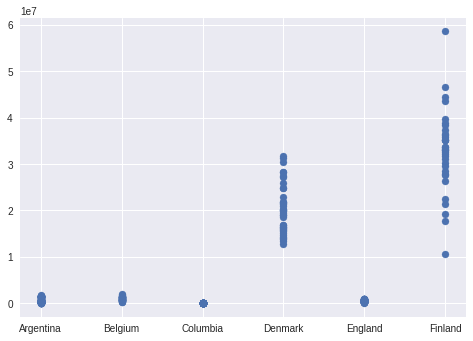

In [15]:
plt.scatter(merge_train_df["Country"], merge_train_df["Scaled_Sales"])

Notice above graph of country-wise Sales. We see that Scaled_Sales value for two countries, namely, Finland and Denmark are quite high, well above the rest. Something similar we also noticed in Expenses v/s Sales graph.

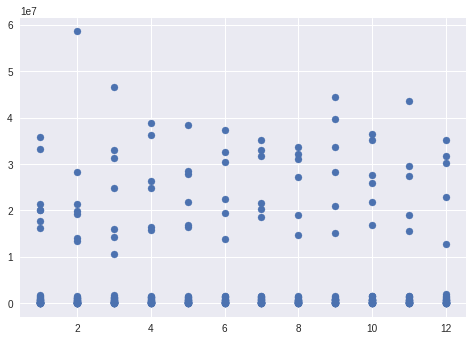

In [16]:
plt.scatter(merge_train_df["Month"], merge_train_df["Scaled_Sales"])

Parse the Date column in Holidays data to extract Year and Month. Convert Holidays data as per the grouped Training data by adding scaled Expenses and Sales value to visualise how holidays drive the Sales value.

In [0]:
holidays = pd.DataFrame()
year = []
month = []

for i in holidays_df["Date"]:
  date = i.split(',')
  year.append(int(date[0]))
  month.append(int(date[1]))

holidays["Year"] = year
holidays["Month"] = month
holidays["Country"] = holidays_df["Country"]
holidays = holidays.drop_duplicates()

print(holidays)
print(holidays.describe())

     Year  Month  Country
0    2014      1  Denmark
1    2014      4  Denmark
5    2014      5  Denmark
7    2014      6  Denmark
9    2014     12  Denmark
..    ...    ...      ...
640  2018      4  Finland
642  2018      5  Finland
645  2018      6  Finland
646  2018     11  Finland
647  2018     12  Finland

[353 rows x 3 columns]
        Year  Month
count  353.0  353.0
mean  2014.5    6.3
std      2.3    3.6
min   2011.0    1.0
25%   2013.0    4.0
50%   2014.0    6.0
75%   2017.0   10.0
max   2018.0   12.0


In [32]:
drop_prod = merge_train_df.drop(columns="Product_ID")
drop_prod = drop_prod.groupby(["Year","Month","Country"]).sum().apply(list).reset_index()

merge_holidays = pd.merge(holidays, drop_prod, on=['Year','Month','Country'], how='inner')
print(merge_holidays.describe())
print(merge_holidays)

        Year  Month  Expense_Price       Sales  Scaled_Expense_Price  \
count  154.0  154.0          154.0       154.0                 154.0   
mean  2014.3    6.2        10369.6  29623662.5                1351.4   
std      1.1    3.6        16205.3  38652354.2                2530.1   
min   2013.0    1.0            0.0    268694.1                   0.0   
25%   2013.0    3.2          541.5   1483413.4                   1.8   
50%   2014.0    5.5         3629.8  13611601.8                 611.1   
75%   2015.0   10.0        15982.2  41850412.7                 815.3   
max   2016.0   12.0        80201.5 199093884.0               12832.2   

       Scaled_Sales  
count         154.0  
mean      6544325.0  
std      11485566.8  
min           632.3  
25%        411287.4  
50%       1253215.1  
75%       1823287.0  
max      43674039.3  
     Year  Month  Country  Expense_Price       Sales  Scaled_Expense_Price  \
0    2014      1  Denmark        53041.9 126116161.9                8486.7 

In [33]:
print(merge_holidays.shape[0])
print(merge_train_df.shape[0])

154
388


Notice that the number of rows in merged Holidays table has been reduced to 154 from 353 rows in Holidays table. It implies that Expenses and Sales data for as many as 299 data points in Holidays table are not available in merged Training data. It is possible that some data points absent in Training data are present in Test data.

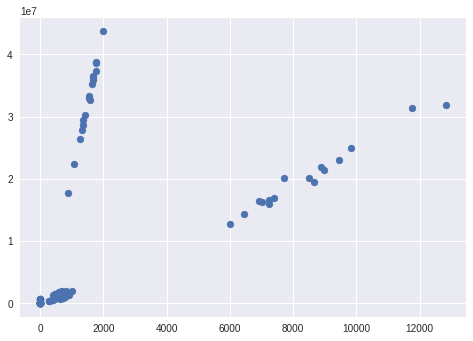

In [35]:
plt.scatter(merge_holidays["Scaled_Expense_Price"], merge_holidays["Scaled_Sales"])

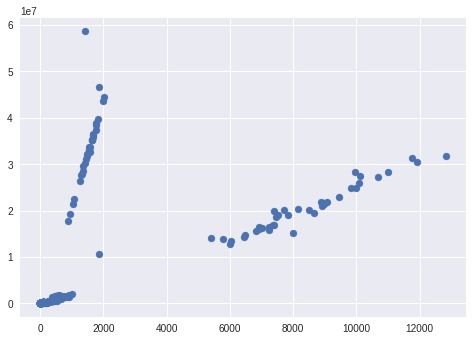

In [36]:
plt.scatter(merge_train_df["Scaled_Expense_Price"], merge_train_df["Scaled_Sales"])

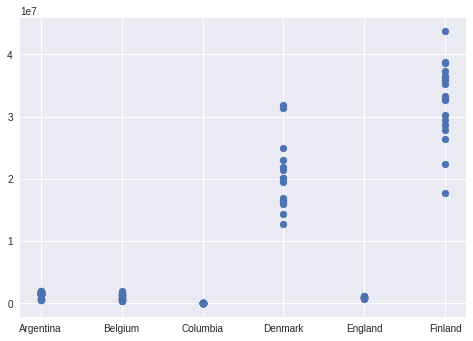

In [41]:
plt.scatter(merge_holidays["Country"], merge_holidays["Scaled_Sales"])

We see that not much difference is there between plots for data points in Holidays and grouped Training data. So, it seems like nothing new can be learned from Holidays data.

Segregate training data into 3 bins based on their Expenses and Sales value as suggested above. Look for the country for which data in each bin belongs to. Compare the binned data with training data for that particular country.

     Year  Month  Country  Product_ID  Expense_Price      Sales  \
236  2013      1  Finland           4          750.6 15153419.5   
239  2013      2  Finland           4          809.1 16524812.2   
242  2013      3  Finland           4         1310.5 28217082.2   
245  2013      4  Finland           4         1065.6 22522665.6   
248  2013      5  Finland           4         1513.3 32942281.0   
..    ...    ...      ...         ...            ...        ...   
323  2015      6  Finland           4         1517.1 31931776.3   
326  2015      7  Finland           4         1313.7 28287106.2   
329  2015      8  Finland           4         1334.4 28765115.0   
332  2015      9  Finland           4         1350.6 28817795.2   
335  2015     10  Finland           4         1441.1 31268810.9   

     Scaled_Expense_Price  Scaled_Sales  
236                 878.2    17729500.8  
239                 946.7    19334030.2  
242                1533.2    33013986.2  
245                1246.8  

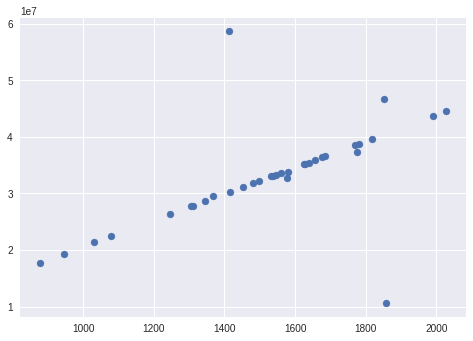

In [37]:
data1 = merge_train_df.loc[(merge_train_df["Scaled_Sales"]>10000000.0) & (merge_train_df["Scaled_Expense_Price"]<2200.0)]
print(data1)
print(data1["Country"].unique())

plt.scatter(data1["Scaled_Expense_Price"], data1["Scaled_Sales"])

In [38]:
print(merge_train_df.loc[(merge_train_df["Country"]=='Finland')])

     Year  Month  Country  Product_ID  Expense_Price      Sales  \
236  2013      1  Finland           4          750.6 15153419.5   
239  2013      2  Finland           4          809.1 16524812.2   
242  2013      3  Finland           4         1310.5 28217082.2   
245  2013      4  Finland           4         1065.6 22522665.6   
248  2013      5  Finland           4         1513.3 32942281.0   
..    ...    ...      ...         ...            ...        ...   
323  2015      6  Finland           4         1517.1 31931776.3   
326  2015      7  Finland           4         1313.7 28287106.2   
329  2015      8  Finland           4         1334.4 28765115.0   
332  2015      9  Finland           4         1350.6 28817795.2   
335  2015     10  Finland           4         1441.1 31268810.9   

     Scaled_Expense_Price  Scaled_Sales  
236                 878.2    17729500.8  
239                 946.7    19334030.2  
242                1533.2    33013986.2  
245                1246.8  

     Year  Month  Country  Product_ID  Expense_Price       Sales  \
5    2013      1  Denmark           2        43843.9 101847627.1   
11   2013      2  Denmark           2        37731.3  84457811.4   
17   2013      3  Denmark           2        40274.6  89156080.6   
23   2013      4  Denmark           2        45275.8  99166393.9   
29   2013      5  Denmark           2        46157.2 106042169.9   
..    ...    ...      ...         ...            ...         ...   
209  2015     11  Denmark           2        63298.2 171598330.3   
215  2015     12  Denmark           2        80201.5 199093884.0   
221  2016      1  Denmark           2        48144.3 126197283.9   
227  2016      2  Denmark           2        62181.0 176268459.0   
233  2016      3  Denmark           2        73427.1 195700752.6   

     Scaled_Expense_Price  Scaled_Sales  
5                  7015.0    16295620.3  
11                 6037.0    13513249.8  
17                 6443.9    14264972.9  
23             

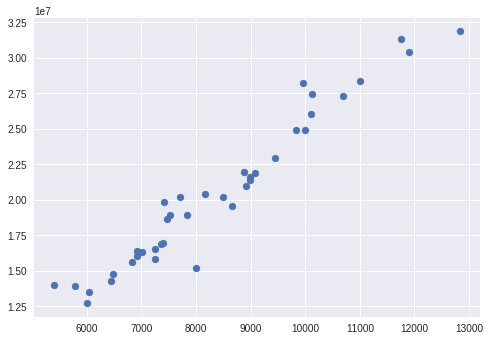

In [39]:
data2 = merge_train_df.loc[merge_train_df["Scaled_Expense_Price"]>5000.0]
print(data2)
print(data2["Country"].unique())

plt.scatter(data2["Scaled_Expense_Price"], data2["Scaled_Sales"])

In [20]:
print(merge_train_df.loc[(merge_train_df["Country"]=='Denmark')])

     Year  Month  Country  Product_ID  Expense_Price       Sales  \
5    2013      1  Denmark           2        43843.9 101847627.1   
11   2013      2  Denmark           2        37731.3  84457811.4   
17   2013      3  Denmark           2        40274.6  89156080.6   
23   2013      4  Denmark           2        45275.8  99166393.9   
29   2013      5  Denmark           2        46157.2 106042169.9   
..    ...    ...      ...         ...            ...         ...   
209  2015     11  Denmark           2        63298.2 171598330.3   
215  2015     12  Denmark           2        80201.5 199093884.0   
221  2016      1  Denmark           2        48144.3 126197283.9   
227  2016      2  Denmark           2        62181.0 176268459.0   
233  2016      3  Denmark           2        73427.1 195700752.6   

     Scaled_Expense_Price  Scaled_Sales  
5                  7015.0    16295620.3  
11                 6037.0    13513249.8  
17                 6443.9    14264972.9  
23             

     Year  Month    Country  Product_ID  Expense_Price      Sales  \
0    2013      1  Argentina           1        14749.3 34346025.0   
1    2013      1  Argentina           2         1329.4  2751851.5   
2    2013      1    Belgium           2          249.6   314850.1   
3    2013      1   Columbia           1         1893.1  3947356.3   
4    2013      1   Columbia           2         1436.7  2885137.1   
..    ...    ...        ...         ...            ...        ...   
328  2015      8    England           5          312.2   465606.5   
330  2015      9    England           4          178.5   175108.6   
331  2015      9    England           5          381.9   627134.7   
333  2015     10    England           4          174.7   164722.1   
334  2015     10    England           5          381.8   624252.7   

     Scaled_Expense_Price  Scaled_Sales  
0                   531.0     1236456.9  
1                    47.9       99066.7  
2                   292.0      368374.7  
3  

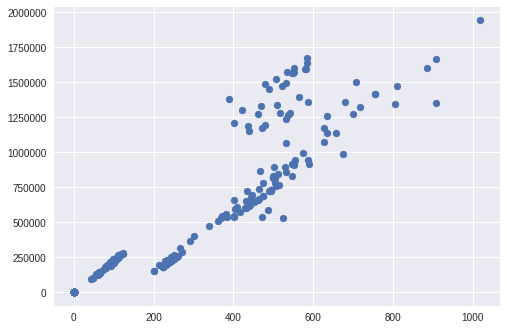

In [21]:
data3 = merge_train_df.loc[(merge_train_df["Scaled_Sales"]<10000000.0) & (merge_train_df["Scaled_Expense_Price"]<2000.0)]
print(data3)
print(data3["Country"].unique())

plt.scatter(data3["Scaled_Expense_Price"], data3["Scaled_Sales"])

We make the following observation:
* Data points in 1st bin belong to Finland (points form line with high slope)
* Data points in 2nd bin belong to Denmark (points form line with moderate slope)
* Data points in 3rd bin belong to the remaining 4 countries, namely Argentina, Belgium, Columbia and England (points which are close to origin)

Above visualisation and analysis show that two features, namely Country and Scaled_Expense_Prices mainly determine the target value of Scaled_Sales.

Let's group the training data so as to keep these two features and sum the entries of Scaled_Sales for common rows.

     Country  Scaled_Expense_Price  Scaled_Sales
0  Argentina                  42.9       92628.2
1  Argentina                  47.3      100955.3
2  Argentina                  47.9       99066.7
3  Argentina                  56.5      133662.7
4  Argentina                  59.7      123704.5
       Scaled_Expense_Price  Scaled_Sales
count                 336.0         336.0
mean                 1334.8     6078557.4
std                  2664.3    11523048.6
min                     0.4         868.6
25%                    63.5      135272.3
50%                   413.4      598108.7
75%                   685.6     1564225.4
max                 12832.2    58633293.4
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9de382f28>


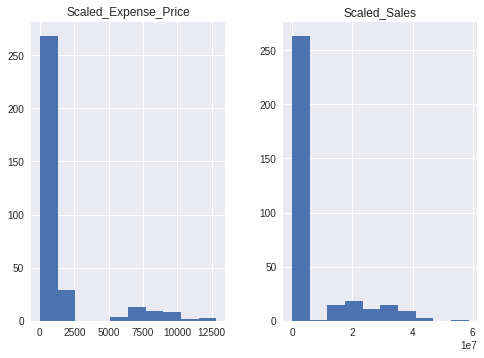

In [22]:
grouped_df2 = merge_train_df.drop(columns=['Year','Month','Product_ID','Expense_Price','Sales'])
grouped_df2 = grouped_df2.groupby(["Country","Scaled_Expense_Price"]).sum().apply(list)
grouped_df2 = grouped_df2.reset_index()    # flattening the grouped dataframe

print(grouped_df2.head())
print(grouped_df2.describe())
print(grouped_df2.hist())

Let's now apply the same changes to Test data too.

In [0]:
# Merge expenses_df and yds_test_df dataframes preserving all the rows that were present in yds_test_df
merge_test_df = pd.merge(yds_test_df, expenses_df, on = ['Year','Month','Product_ID','Country'], how='left')

# Sort the rows based on S_No as that's how yds_test_df is sorted
merge_test_df = merge_test_df.sort_values('S_No')
merge_test_df = merge_test_df.drop(columns='S_No')

merge_test_df["Sales"] = 0.0

        Year  Month  Product_ID  Sales  Expense_Price
count  105.0  105.0       105.0  105.0           99.0
mean  2016.2    6.0         2.4    0.0        10903.7
std      0.5    3.6         1.3    0.0        22514.8
min   2015.0    1.0         1.0    0.0          157.8
25%   2016.0    3.0         2.0    0.0          743.6
50%   2016.0    6.0         2.0    0.0         1792.3
75%   2016.0    9.0         4.0    0.0         3889.7
max   2017.0   12.0         5.0    0.0        84161.8
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9d46084e0>
     Year  Month  Product_ID    Country  Sales  Expense_Price
0    2016      4           1  Argentina    0.0         8214.9
1    2016      5           1  Argentina    0.0        10777.9
2    2016      6           1  Argentina    0.0        10320.7
3    2016      7           1  Argentina    0.0         7377.6
4    2016      8           1  Argentina    0.0         9805.7
..    ...    ...         ...        ...    ...            ...
100  2016    

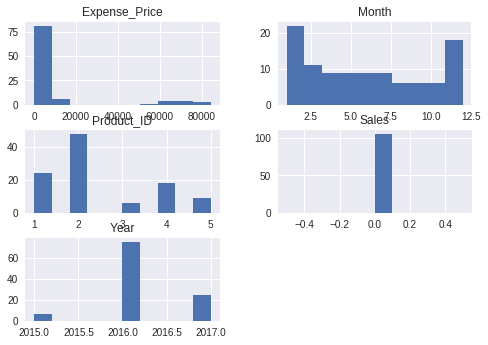

In [176]:
print(merge_test_df.describe())
print(merge_test_df.hist())
print(merge_test_df)

Replace rows with nan values in Expense_Price column with its mean value in training data respective to the country.

In [44]:
train_arg = merge_train_df.loc[merge_train_df['Country']=='Argentina']
mean_train_arg = train_arg["Expense_Price"].mean()

train_col = merge_train_df.loc[merge_train_df['Country']=='Columbia']
mean_train_col = train_col["Expense_Price"].mean()

print(mean_train_arg)
print(mean_train_col)

8222.515128205127
2210.50158974359


In [177]:
for i in zip(*np.where(pd.isnull(merge_test_df['Expense_Price']))):
  if merge_test_df['Country'].loc[i] == 'Argentina':
    merge_test_df['Expense_Price'].loc[i] = mean_train_arg
  elif merge_test_df['Country'].loc[i] == 'Columbia':
    merge_test_df['Expense_Price'].loc[i] = mean_train_col

print(merge_test_df.tail())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


     Year  Month  Product_ID  Country  Sales  Expense_Price
100  2016      3           4  Finland    0.0         1439.7
101  2016      4           4  Finland    0.0         1378.9
102  2016      5           4  Finland    0.0          970.2
103  2016      6           4  Finland    0.0         1289.0
104  2016      7           4  Finland    0.0          900.1


In [178]:
merge_test_df = scaling_usd(merge_test_df)

print(merge_test_df)

     Year  Month  Product_ID    Country  Sales  Expense_Price  \
0    2016      4           1  Argentina    0.0         8214.9   
1    2016      5           1  Argentina    0.0        10777.9   
2    2016      6           1  Argentina    0.0        10320.7   
3    2016      7           1  Argentina    0.0         7377.6   
4    2016      8           1  Argentina    0.0         9805.7   
..    ...    ...         ...        ...    ...            ...   
100  2016      3           4    Finland    0.0         1439.7   
101  2016      4           4    Finland    0.0         1378.9   
102  2016      5           4    Finland    0.0          970.2   
103  2016      6           4    Finland    0.0         1289.0   
104  2016      7           4    Finland    0.0          900.1   

     Scaled_Expense_Price  Scaled_Sales  
0                   295.7           0.0  
1                   388.0           0.0  
2                   371.5           0.0  
3                   265.6           0.0  
4        

       Country  Scaled_Expense_Price  Scaled_Sales
0    Argentina                 295.7           0.0
1    Argentina                 388.0           0.0
2    Argentina                 371.5           0.0
3    Argentina                 265.6           0.0
4    Argentina                 353.0           0.0
..         ...                   ...           ...
100    Finland                1684.5           0.0
101    Finland                1613.3           0.0
102    Finland                1135.1           0.0
103    Finland                1508.2           0.0
104    Finland                1053.1           0.0

[105 rows x 3 columns]
       Scaled_Expense_Price  Scaled_Sales
count                 105.0         105.0
mean                 1627.8           0.0
std                  3525.7           0.0
min                     0.5           0.0
25%                     1.4           0.0
50%                   295.7           0.0
75%                   849.6           0.0
max                 13465.9 

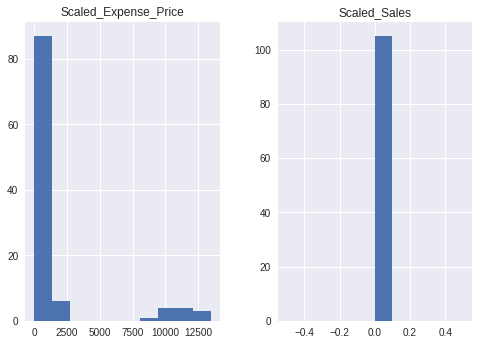

In [179]:
test_grouped_df2 = merge_test_df.drop(columns=['Year','Month','Product_ID','Expense_Price','Sales'])

# Don't do grouping of test data as that reduces the number of rows.
#test_grouped_df2 = test_grouped_df2.groupby(["Country","Scaled_Expense_Price"]).sum().apply(list)
#test_grouped_df2 = test_grouped_df2.reset_index()    # flattening the grouped dataframe

print(test_grouped_df2)
print(test_grouped_df2.describe())
print(test_grouped_df2.hist())

In [109]:
# Check the final number of training and test data points.
print(grouped_df2.shape[0])
print(test_grouped_df2.shape[0])

336
105


As there is not much difference in Sales and Expenses value of rows in 3rd bin (points that are close to 0), we remove the Country name and instead label them all as 'Others' in Country column to simplify the model.

In [0]:
def country_others(dataframe):
  
  for i, row in dataframe.iterrows():
    if (row["Country"]=='Argentina' or 
        row["Country"]=='Belgium' or 
        row["Country"]=='Columbia' or 
        row["Country"]=='England'):
      dataframe.at[i, "Country"] = "Others"
  return dataframe

In [180]:
grouped_df2 = country_others(grouped_df2)
binned_test_df2 = country_others(test_grouped_df2)

print(grouped_df2)
print(grouped_df2["Country"].unique())
print(binned_test_df2)
print(binned_test_df2["Country"].unique())

     Country  Scaled_Expense_Price  Scaled_Sales
0     Others                  42.9       92628.2
1     Others                  47.3      100955.3
2     Others                  47.9       99066.7
3     Others                  56.5      133662.7
4     Others                  59.7      123704.5
..       ...                   ...           ...
331  Finland                1818.5    39664424.2
332  Finland                1852.7    46611515.1
333  Finland                1858.5    10582560.3
334  Finland                1990.4    43674039.3
335  Finland                2027.1    44483391.7

[336 rows x 3 columns]
['Others' 'Denmark' 'Finland']
     Country  Scaled_Expense_Price  Scaled_Sales
0     Others                 295.7           0.0
1     Others                 388.0           0.0
2     Others                 371.5           0.0
3     Others                 265.6           0.0
4     Others                 353.0           0.0
..       ...                   ...           ...
100  Finland  

As Country contains string values and not numeric, its difficult to use the data for model training. Therefore, we replace Country column with 3 new ones, namely, 'Others', 'Denmark' and 'Finland' and add 1.0 to the column where country name belongs to that.

In [53]:
Country = list(grouped_df2["Country"].unique())
print(Country)

['Others', 'Denmark', 'Finland']


In [0]:
def select_and_transform_features(source_df, expenses=False):
  selected_ex = pd.DataFrame()
  selected_ex["Scaled_Sales"] = source_df["Scaled_Sales"]
  
  if expenses:
    selected_ex["Scaled_Expense_Price"] = source_df["Scaled_Expense_Price"]
        
  for c in Country:
    selected_ex[c] = source_df["Country"].apply(
      lambda l: 1.0 if l == c else 0.0)
  
  return selected_ex

In [55]:
selected_grouped_df2 = select_and_transform_features(grouped_df2, expenses=True)
print(selected_grouped_df2)

     Scaled_Sales  Scaled_Expense_Price  Others  Denmark  Finland
0         92628.2                  42.9     1.0      0.0      0.0
1        100955.3                  47.3     1.0      0.0      0.0
2         99066.7                  47.9     1.0      0.0      0.0
3        133662.7                  56.5     1.0      0.0      0.0
4        123704.5                  59.7     1.0      0.0      0.0
..            ...                   ...     ...      ...      ...
331    39664424.2                1818.5     0.0      0.0      1.0
332    46611515.1                1852.7     0.0      0.0      1.0
333    10582560.3                1858.5     0.0      0.0      1.0
334    43674039.3                1990.4     0.0      0.0      1.0
335    44483391.7                2027.1     0.0      0.0      1.0

[336 rows x 5 columns]


In [181]:
selected_test_grouped_df2 = select_and_transform_features(binned_test_df2, expenses=True)
print(selected_test_grouped_df2)

     Scaled_Sales  Scaled_Expense_Price  Others  Denmark  Finland
0             0.0                 295.7     1.0      0.0      0.0
1             0.0                 388.0     1.0      0.0      0.0
2             0.0                 371.5     1.0      0.0      0.0
3             0.0                 265.6     1.0      0.0      0.0
4             0.0                 353.0     1.0      0.0      0.0
..            ...                   ...     ...      ...      ...
100           0.0                1684.5     0.0      0.0      1.0
101           0.0                1613.3     0.0      0.0      1.0
102           0.0                1135.1     0.0      0.0      1.0
103           0.0                1508.2     0.0      0.0      1.0
104           0.0                1053.1     0.0      0.0      1.0

[105 rows x 5 columns]


Randomize the Training data and split it into Training and Validation set.

In [0]:
# Randomize the rows
selected_grouped_df2 = selected_grouped_df2.reindex(np.random.permutation(selected_grouped_df2.index))

In [59]:
split_ratio = 0.7
total = len(grouped_df2)
split = int(split_ratio * total)

feature = selected_grouped_df2[["Others", "Denmark","Finland","Scaled_Expense_Price"]]
target = selected_grouped_df2[["Scaled_Sales"]]

train_ex = feature.head(split)
train_targets = target.head(split)
validation_ex = feature.tail(total-split)
validation_targets = target.tail(total-split)

print(train_ex.shape[0])
print(validation_targets.shape[0])
print(train_ex)
print(train_targets)
print(validation_targets)

235
101
     Others  Denmark  Finland  Scaled_Expense_Price
26      1.0      0.0      0.0                 102.3
306     0.0      0.0      1.0                1246.8
128     1.0      0.0      0.0                   0.6
124     1.0      0.0      0.0                   0.5
215     0.0      1.0      0.0                8169.9
..      ...      ...      ...                   ...
180     1.0      0.0      0.0                   1.0
300     1.0      0.0      0.0                 574.3
250     1.0      0.0      0.0                 236.3
23      1.0      0.0      0.0                  97.6
51      1.0      0.0      0.0                 478.4

[235 rows x 4 columns]
     Scaled_Sales
26       234446.3
306    26351518.8
128        1132.3
124        1102.3
215    20388131.7
..            ...
180        2114.9
300      993320.7
250      208705.1
23       234618.0
51      1192174.2

[235 rows x 1 columns]
     Scaled_Sales
232    30416759.8
258      229523.1
335    44483391.7
91       650498.8
43      120997

Below are functions for Machine Learning model training. We use the following:
* Linear Regressor to fit a straight hyperplane to the data
* Adagrad Optimizer with gradient clipping
* L2 regularization

To calculate the loss, we use Symmetric Mean Absolute Percent Error (SMAPE). SMAPE is the average of difference between forecast and actual values divided by the sum of their absolute values.

In [0]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(100)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [0]:
import math

def smape_fast(y_pred, y_true):
    out = 0
    for i in range(y_true.shape[0]):
        a = math.fabs(y_true[i])
        b = math.fabs(y_pred[i])
        c = a + b
        if c == 0:
            continue
        out += math.fabs(a - b) / c
    out *= (200.0 / y_true.shape[0])
    return out

In [0]:
def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    regularization,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.

  Returns:
    A `LinearRegressor` object trained on the training data.
  """

  periods = 15
  steps_per_period = steps / periods

  # Create a linear regressor object.
  my_optimizer = tf.train.ProximalAdagradOptimizer(learning_rate=learning_rate,
                                                  l2_regularization_strength=regularization)  #Adagrad
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )

  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets, 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets, 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess loss metrics.
  print("Training model...")
  print("SMAPE (on training data):")
  training_smape = []
  validation_smape = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_smape_error = smape_fast(training_predictions, np.array(training_targets.values))
    validation_smape_error = smape_fast(validation_predictions, np.array(validation_targets.values))
    
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_smape_error))
    
    # Add the loss metrics from this period to our list.
    training_smape.append(training_smape_error)
    validation_smape.append(validation_smape_error)
  
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("SMAPE")
  plt.xlabel("Periods")
  plt.title("SMAPE Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_smape, label="training")
  plt.plot(validation_smape, label="validation")
  plt.legend()

  return linear_regressor

Below is the actual training function. There are 4 hyperparameters which you need to tune to get an optimized model with lowest SMAPE loss. 

Feel free to tweak these values.

Training model...
SMAPE (on training data):
  period 00 : 107.90
  period 01 : 80.55
  period 02 : 65.31
  period 03 : 55.36
  period 04 : 47.73
  period 05 : 42.78
  period 06 : 39.37
  period 07 : 37.12
  period 08 : 35.60
  period 09 : 35.97
  period 10 : 35.00
  period 11 : 35.22
  period 12 : 35.89
  period 13 : 36.58
  period 14 : 37.22
Model training finished.


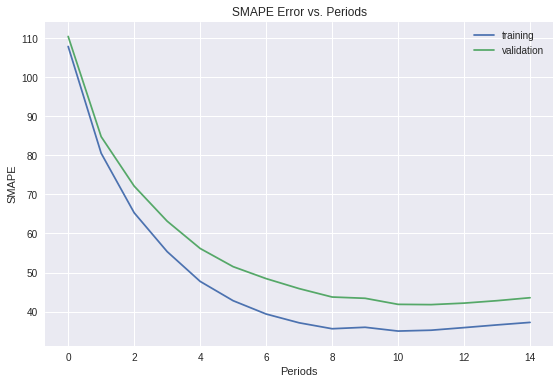

In [65]:
linear_regressor = train_linear_regressor_model(
    learning_rate=40.0,
    steps=1000,
    batch_size=10,
    regularization=0.00006,
    training_examples=train_ex,
    training_targets=train_targets,
    validation_examples=validation_ex,
    validation_targets=validation_targets)

Use the trained model to predict target values of Validation data and then, compare them with the actual target values. As before, we plot Scaled_Expense_Price v/s Scaled_Sales.

In [67]:
predict_validation_input_fn = lambda: my_input_fn(validation_ex, 
                                                    validation_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)

validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

predictions_df = pd.DataFrame()
predictions_df["Feature"] = validation_ex["Scaled_Expense_Price"]
predictions_df["Target"] = validation_targets
predictions_df["Prediction"] = validation_predictions
print(predictions_df.describe())

       Feature     Target  Prediction
count    101.0      101.0       101.0
mean    1091.0  6261297.0   2514324.5
std     2297.2 11883334.3   5294350.0
min        0.4      868.6       981.6
25%       63.5   133147.6    146283.2
50%      250.8   282262.7    578057.2
75%      586.5  1592759.7   1351649.8
max    11906.9 44483391.7  27441290.0


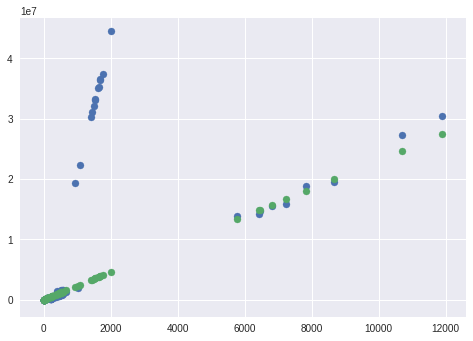

In [68]:
plt.scatter(predictions_df["Feature"], predictions_df["Target"])
plt.scatter(predictions_df["Feature"], predictions_df["Prediction"])

We note that the trained Linear Regressor completely ignores the data points forming line with high slope (pertaining to Finland) and gives totally wrong prediction for these points. It performs well for data belonging to the other two bins.

Convert test data into appropriate format and predict the target value for it.

In [182]:
test_feature = selected_test_grouped_df2[["Others", "Denmark","Finland","Scaled_Expense_Price"]]
test_target = selected_test_grouped_df2[["Scaled_Sales"]]

print(test_feature)
print(test_target)

     Others  Denmark  Finland  Scaled_Expense_Price
0       1.0      0.0      0.0                 295.7
1       1.0      0.0      0.0                 388.0
2       1.0      0.0      0.0                 371.5
3       1.0      0.0      0.0                 265.6
4       1.0      0.0      0.0                 353.0
..      ...      ...      ...                   ...
100     0.0      0.0      1.0                1684.5
101     0.0      0.0      1.0                1613.3
102     0.0      0.0      1.0                1135.1
103     0.0      0.0      1.0                1508.2
104     0.0      0.0      1.0                1053.1

[105 rows x 4 columns]
     Scaled_Sales
0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
..            ...
100           0.0
101           0.0
102           0.0
103           0.0
104           0.0

[105 rows x 1 columns]


In [0]:
predict_test_input_fn = lambda: my_input_fn(test_feature, 
                                            test_target, 
                                            num_epochs=1, 
                                            shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

In [184]:
print(test_feature.head())
print(test_predictions[0:5])
print(len(test_predictions))

   Others  Denmark  Finland  Scaled_Expense_Price
0     1.0      0.0      0.0                 295.7
1     1.0      0.0      0.0                 388.0
2     1.0      0.0      0.0                 371.5
3     1.0      0.0      0.0                 265.6
4     1.0      0.0      0.0                 353.0
[681540.75 894186.8  856253.6  612073.   813528.  ]
105


Extract the predicted values for data points belonging to Finland. Compare that with the Sales value of data points belonging to Finland in training data.

In [185]:
print(test_feature.loc[(test_feature['Finland']==1.0)])

     Others  Denmark  Finland  Scaled_Expense_Price
96      0.0      0.0      1.0                1528.9
97      0.0      0.0      1.0                1754.4
98      0.0      0.0      1.0                1382.1
99      0.0      0.0      1.0                1100.0
100     0.0      0.0      1.0                1684.5
101     0.0      0.0      1.0                1613.3
102     0.0      0.0      1.0                1135.1
103     0.0      0.0      1.0                1508.2
104     0.0      0.0      1.0                1053.1


In [186]:
print(test_predictions[96:105])

[3523552.5 4043201.  3185351.  2535197.2 3882188.  3718041.8 2616098.8
 3475806.5 2427048.5]


In [187]:
print(grouped_df2.loc[(grouped_df2['Country']=='Finland')])

     Country  Scaled_Expense_Price  Scaled_Sales
302  Finland                 878.2    17729500.8
303  Finland                 946.7    19334030.2
304  Finland                1031.4    21315658.3
305  Finland                1078.4    22412442.9
306  Finland                1246.8    26351518.8
..       ...                   ...           ...
331  Finland                1818.5    39664424.2
332  Finland                1852.7    46611515.1
333  Finland                1858.5    10582560.3
334  Finland                1990.4    43674039.3
335  Finland                2027.1    44483391.7

[34 rows x 3 columns]


We see that the predicted values for above data (of Finland) is off by one digit place. Its range is 1/10th of the range of values in training data.

We convert back the predicted values from USD to their appropriate local currency.

In [0]:
def usd_to_local(dataframe_orig):
  # Scaling USD to local currency
  
  # Local currency to USD conversion rate
  arg_usd = 0.036
  bel_usd = 1.17
  col_usd = 0.00035
  den_usd = 0.16
  eng_usd = 1.31
  fin_usd = 1.17
  
  # Make a copy of original dataframe as the function modifies the original not a copy of it.
  dataframe = pd.DataFrame()
  dataframe = dataframe_orig.copy()
  
  for i, row in dataframe.iterrows():
    if row["Country"] == 'Argentina':
      dataframe.at[i, "Scaled_Expense_Price"] = (1.0/arg_usd) * row["Scaled_Expense_Price"]
      dataframe.at[i, "Scaled_Sales"] = (1.0/arg_usd) * row["Scaled_Sales"]
    elif row["Country"] == 'Belgium':
      dataframe.at[i, "Scaled_Expense_Price"] = (1.0/bel_usd) * row["Scaled_Expense_Price"]
      dataframe.at[i, "Scaled_Sales"] = (1.0/bel_usd) * row["Scaled_Sales"]
    elif row["Country"] == 'Columbia':
      dataframe.at[i, "Scaled_Expense_Price"] = (1.0/col_usd) * row["Scaled_Expense_Price"]
      dataframe.at[i, "Scaled_Sales"] = (1.0/col_usd) * row["Scaled_Sales"]
    elif row["Country"] == 'Denmark':
      dataframe.at[i, "Scaled_Expense_Price"] = (1.0/den_usd) * row["Scaled_Expense_Price"]
      dataframe.at[i, "Scaled_Sales"] = (1.0/den_usd) * row["Scaled_Sales"]
    elif row["Country"] == 'England':
      dataframe.at[i, "Scaled_Expense_Price"] = (1.0/eng_usd) * row["Scaled_Expense_Price"]
      dataframe.at[i, "Scaled_Sales"] = (1.0/eng_usd) * row["Scaled_Sales"]
    elif row["Country"] == 'Finland':
      dataframe.at[i, "Scaled_Expense_Price"] = (1.0/fin_usd) * row["Scaled_Expense_Price"]
      dataframe.at[i, "Scaled_Sales"] = (1.0/fin_usd) * row["Scaled_Sales"]
  
  return dataframe

In [189]:
test_grouped_df2["Scaled_Sales"] = test_predictions
print(test_grouped_df2)

     Country  Scaled_Expense_Price  Scaled_Sales
0     Others                 295.7      681540.8
1     Others                 388.0      894186.8
2     Others                 371.5      856253.6
3     Others                 265.6      612073.0
4     Others                 353.0      813528.0
..       ...                   ...           ...
100  Finland                1684.5     3882188.0
101  Finland                1613.3     3718041.8
102  Finland                1135.1     2616098.8
103  Finland                1508.2     3475806.5
104  Finland                1053.1     2427048.5

[105 rows x 3 columns]


In [190]:
test_local_currency = usd_to_local(test_grouped_df2)
print(test_local_currency)

     Country  Scaled_Expense_Price  Scaled_Sales
0     Others                 295.7      681540.8
1     Others                 388.0      894186.8
2     Others                 371.5      856253.6
3     Others                 265.6      612073.0
4     Others                 353.0      813528.0
..       ...                   ...           ...
100  Finland                1439.7     3318109.5
101  Finland                1378.9     3177813.5
102  Finland                 970.2     2235981.8
103  Finland                1289.0     2970774.8
104  Finland                 900.1     2074400.4

[105 rows x 3 columns]


Add the final Sales value column to the Test data.

In [196]:
yds_test_df['Sales'] = np.asarray(test_local_currency['Scaled_Sales'])
yds_test_df

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,681540.8
1,79074,2016,5,1,Argentina,894186.8
2,79075,2016,6,1,Argentina,856253.6
3,79076,2016,7,1,Argentina,612073.0
4,79077,2016,8,1,Argentina,813528.0
...,...,...,...,...,...,...
100,79173,2016,3,4,Finland,3318109.5
101,79174,2016,4,4,Finland,3177813.5
102,79175,2016,5,4,Finland,2235981.8
103,79176,2016,6,4,Finland,2970774.8


Finally, we convert the dataframe of Test data into a .csv file and download it.


P.S. - Use Chrome to download the file using code below as it doesn't work in other browsers.

In [0]:
yds_test_df.to_csv('yds_submission2018.csv', index=False)

from google.colab import files
files.download('yds_submission2018.csv')

If you have reached till the end, then pat yourself on the back. You're trully a Rockstar!

#<-----End----->